In [1]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
import math
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [2]:
p=17
n=4
key =""
for cc in range(n):
    key+="0"
index=[0,1,2,3]

In [3]:
def getZero(n):
    key = ''
    for i in range(n):
        key+='0'
    return key

In [4]:
def hadamardForAll2(n):
    for i in range(1,n):
        qc.h(q[index[i]])
    qc.sx(q[index[0]])

In [5]:
def hadamardForAll21(n):
    for i in range(1,n):
        qc.h(q[index[i]])
    qc.sxdg(q[index[0]])

In [6]:
def OneStep2(K,p):
    global qc,q
    angle1=K[2]*math.pi/p
    qc.crz(angle1,q[index[1]],q[index[0]])
    angle1=K[1]*math.pi/p
    qc.crz(angle1,q[index[2]],q[index[0]])
    angle1=K[0]*math.pi/p
    qc.crz(angle1,q[index[3]],q[index[0]])
    angle1 = K[3] * math.pi/p
    qc.rz(angle1, q[index[0]])

In [7]:
def iteration(x):
    global n, p,K,key, qc, index
    n=4
    hadamardForAll2(n)
    qc.barrier()
    for i in range(x):
        #first=False
        OneStep2(K,p)
    qc.barrier()
    hadamardForAll21(n)
    qc.barrier()
    for i in range(n):
        qc.measure(q[i],c[i])
# return qc

Start
Measurement Counts: {34: 0}


/usr/local/lib/python3.11/site-packages/qiskit/visualization/counts_visualization.py:401: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_ylim, min([1.1 * sum(all_vals), max(1.1 * val for val in all_vals)])])


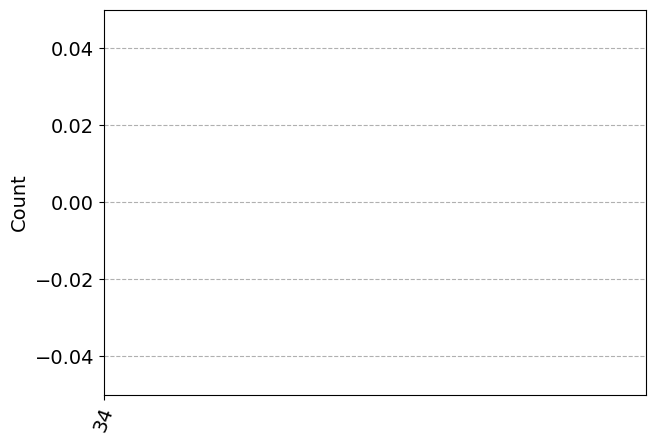

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider.backends.cairo import FakeCairoV2
from qiskit.visualization import plot_circuit_layout
from qiskit.visualization import plot_histogram
max_number = 129#4*p+1+14
count_p_max = -1
count_not_p_max = -1
print("Start")
index=[0,1,2,3]
shotss=100
n=4
Ks2=[[4, 8, 12, 6]]


results = []
for K in Ks2:
            all_counts = {}
            number_of_repetition = 2*17
            # for number_of_repetition in range(1,max_number):
            q = QuantumRegister(n)
            c = ClassicalRegister(n)
            qc = QuantumCircuit(q,c)
            iteration(number_of_repetition)
                
                # Step 2: Select the Backend
            backend = FakeCairoV2()  # Create a simulated backend with 3 qubits
                
                # Step 3: Transpile the Circuit
            transpiled_circuit = transpile(qc, backend=backend, optimization_level=3)
                
                # Step 4: Execute the Circuit
            job = backend.run(transpiled_circuit, shots=shotss)  # Run the circuit with 1024 shots
                
                # Step 5: Retrieve and Print Results
            result = job.result()
            counts = result.get_counts(transpiled_circuit)
            try:
                all_counts[number_of_repetition] = counts['00000']
            except KeyError:
                all_counts[number_of_repetition] = 0
print(f'Measurement Counts: {all_counts}')
plot_histogram(all_counts)
#transpiled_circuit.draw("mpl")
#plot_circuit_layout(transpiled_circuit, backend)